<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization**


Estimated time needed: **45** minutes


In this lab, you will focus on data visualization. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


After completing this lab, you will be able to:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition and comparison of data.




## Demo: How to work with database


Download the database file.


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

--2025-03-27 03:00:16--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  63.0MB/s    in 2.4s    

2025-03-27 03:00:21 (63.0 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



**Install and Import Necessary Python Libraries**

Ensure that you have the required libraries installed to work with SQLite and Pandas:


In [8]:
!pip install pandas 
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

**Read the CSV File into a Pandas DataFrame**

Load the Stack Overflow survey data into a Pandas DataFrame:


In [9]:
# Read the CSV file
df = pd.read_csv('survey-data.csv')

# Display the first few rows of the data
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


**Create a SQLite Database and Insert the Data**

Now, let's create a new SQLite database (`survey-data.sqlite`) and insert the data from the DataFrame into a table using the sqlite3 library:


In [ ]:
import sqlite3

# Create a connection to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Write the dataframe to the SQLite database
df.to_sql('main', conn, if_exists='replace', index=False)


# Close the connection
conn.close()


**Verify the Data in the SQLite Database**
Verify that the data has been correctly inserted into the SQLite database by running a simple query:


In [5]:
# Reconnect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Run a simple query to check the data
QUERY = "SELECT * FROM main LIMIT 5"
df_check = pd.read_sql_query(QUERY, conn)

# Display the results
print(df_check)


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time       None  Apples   
4   Student, full-time       None  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                               None   
4                                 

## Demo: Running an SQL Query


Count the number of rows in the table named 'main'


In [13]:
import sqlite3
import pandas as pd

# Connect to the SQLite database
conn = sqlite3.connect('your_database_name.db')

# Check if the table exists
tables_query = "SELECT name FROM sqlite_master WHERE type='table';"
tables = pd.read_sql_query(tables_query, conn)
print(tables)

# If the table exists, adjust the query to select the data
QUERY = """
SELECT COUNT(*) 
FROM survey_data  -- Replace with correct table name
"""
df = pd.read_sql_query(QUERY, conn)

# Display the result
print(df.head())

# Don't forget to close the connection
conn.close()


Empty DataFrame
Columns: [name]
Index: []


DatabaseError: Execution failed on sql '
SELECT COUNT(*) 
FROM survey_data  -- Replace with correct table name
': no such table: survey_data

## Demo: Listing All Tables


To view the names of all tables in the database:


In [ ]:
QUERY = """
SELECT name as Table_Name FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


## Demo: Running a Group By Query
    
For example, you can group data by a specific column, like Age, to get the count of respondents in each age group:


In [ ]:
QUERY = """
SELECT Age, COUNT(*) as count
FROM main
GROUP BY Age
ORDER BY Age
"""
pd.read_sql_query(QUERY, conn)


## Demo: Describing a table

Use this query to get the schema of a specific table, main in this case:


In [ ]:
table_name = 'main'

QUERY = """
SELECT sql FROM sqlite_master 
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY, conn)
print(df.iat[0,0])


## Hands-on Lab


### Visualizing the Distribution of Data

**Histograms**

Plot a histogram of CompTotal (Total Compensation).


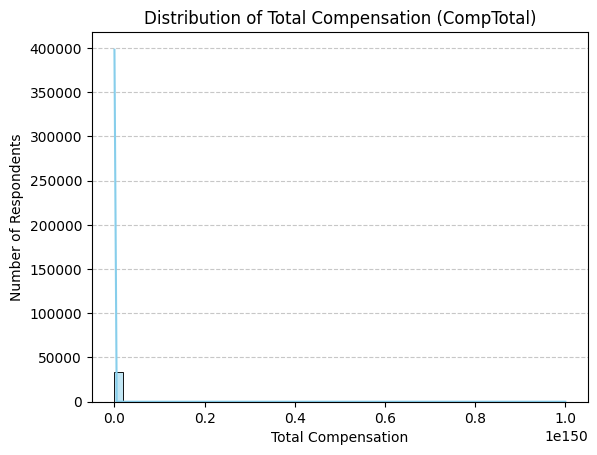

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file
df = pd.read_csv('survey-data.csv')

# Plot histogram with KDE for Total Compensation (CompTotal)
sns.histplot(df["CompTotal"], bins=50, kde=True, color="skyblue")

# Formatting the plot
plt.xlabel("Total Compensation")
plt.ylabel("Number of Respondents")
plt.title("Distribution of Total Compensation (CompTotal)")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()



**Box Plots**

Plot a box plot of Age.


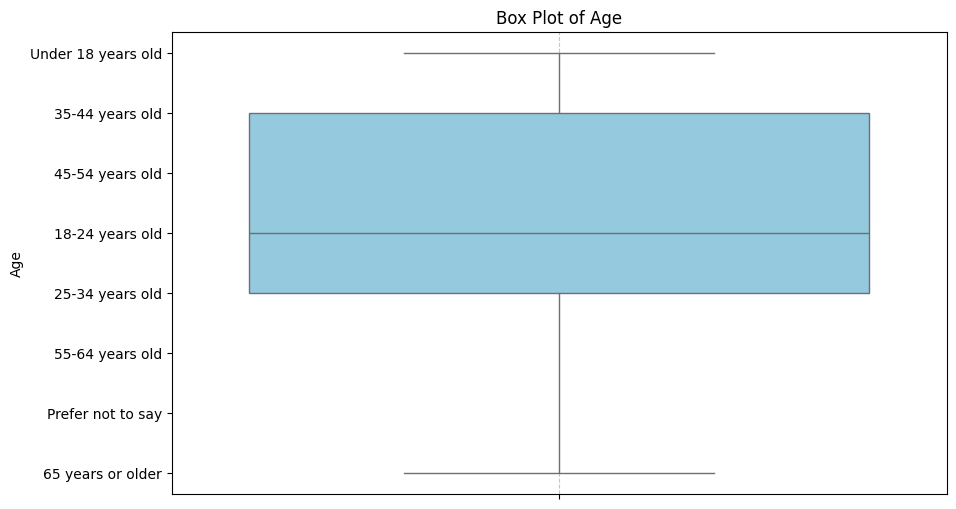

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file
df = pd.read_csv('survey-data.csv')

# Check if the 'Age' column exists and drop rows with missing values
if 'Age' in df.columns:
    df = df.dropna(subset=["Age"])
    
    # Set figure size
    plt.figure(figsize=(10, 6))

    # Plot the box plot for Age on the y-axis
    sns.boxplot(y=df["Age"], color="skyblue")

    # Formatting the plot
    plt.ylabel("Age")
    plt.title("Box Plot of Age")
    plt.grid(axis="x", linestyle="--", alpha=0.7)

    # Show the plot
    plt.show()
else:
    print("Age column not found in the dataset.")


### Visualizing Relationships in Data

**Scatter Plots**

Create a scatter plot of Age and WorkExp.


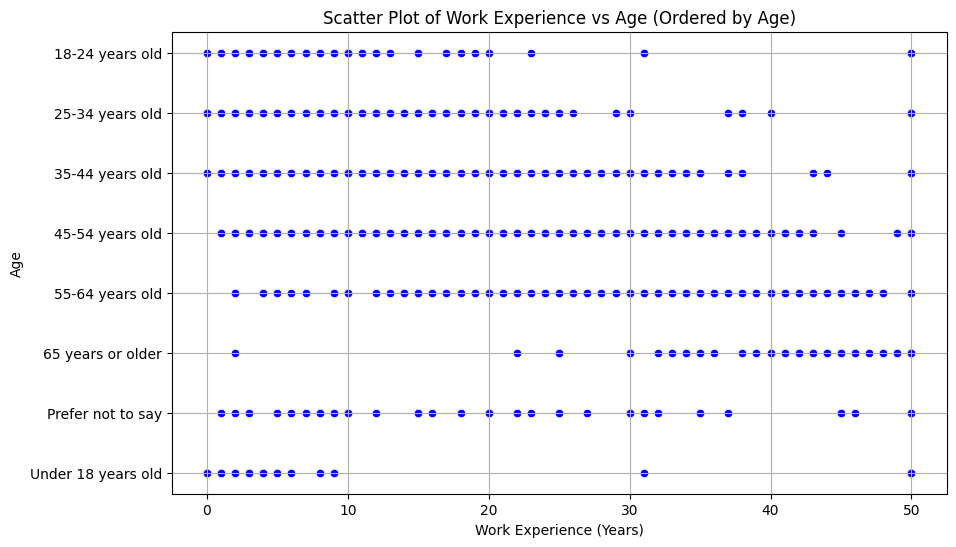

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file
df = pd.read_csv('survey-data.csv')

# Check if 'Age' and 'WorkExp' columns exist and drop rows with missing values
if 'Age' in df.columns and 'WorkExp' in df.columns:
    df = df.dropna(subset=["Age", "WorkExp"])
    
    # Sort the dataframe by Age to order it from youngest to oldest
    df = df.sort_values(by="Age")
    
    # Set figure size
    plt.figure(figsize=(10, 6))

    # Plot the scatter plot for WorkExp vs Age (with Age on the Y-axis)
    sns.scatterplot(x=df["WorkExp"], y=df["Age"], color="blue")

    # Formatting the plot
    plt.xlabel("Work Experience (Years)")
    plt.ylabel("Age")
    plt.title("Scatter Plot of Work Experience vs Age (Ordered by Age)")
    plt.grid(True)

    # Show the plot
    plt.show()
else:
    print("Age or WorkExp column not found in the dataset.")



**Bubble Plots**

Create a bubble plot of `TimeSearching` and `Frustration` using the Age column as the bubble size.


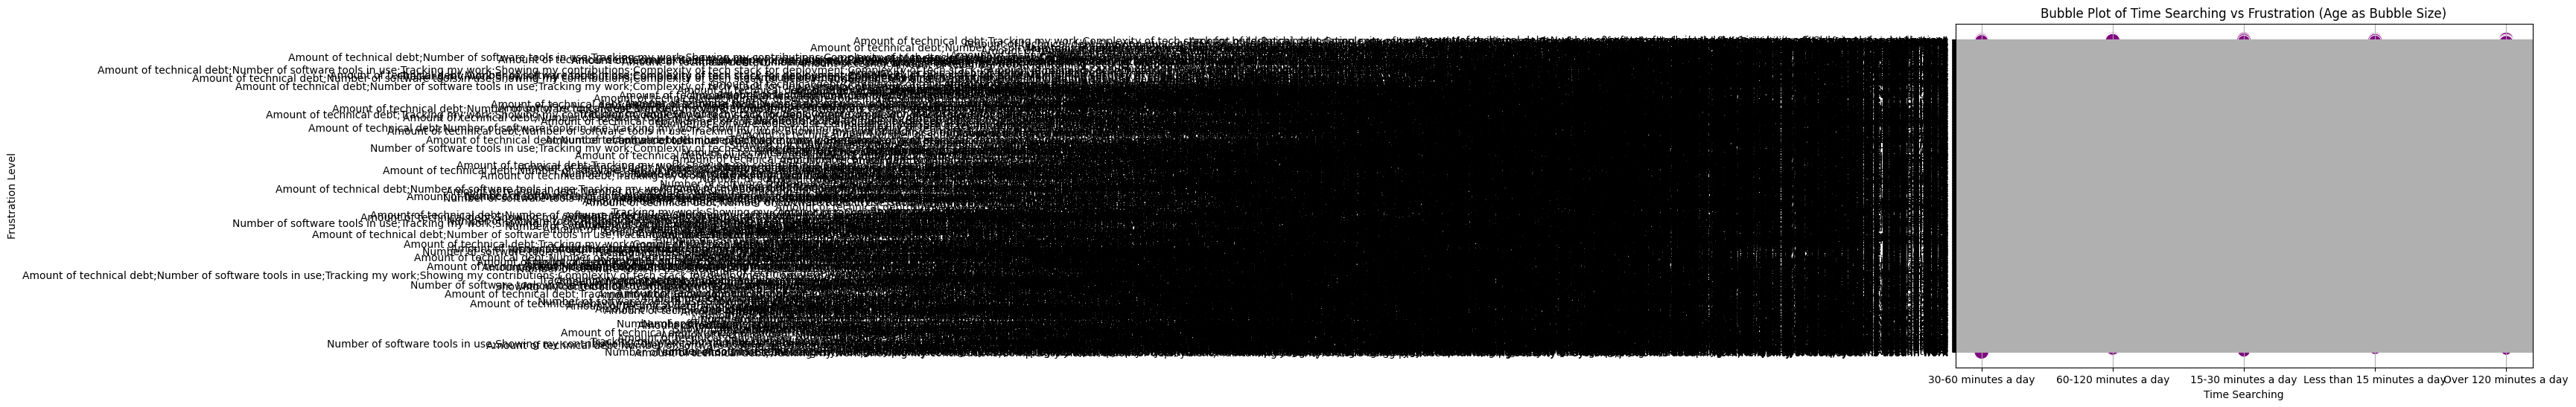

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file
df = pd.read_csv('survey-data.csv')

# Check if the necessary columns exist and drop rows with missing values
if 'TimeSearching' in df.columns and 'Frustration' in df.columns and 'Age' in df.columns:
    df = df.dropna(subset=["TimeSearching", "Frustration", "Age"])

    # Set figure size
    plt.figure(figsize=(10, 6))

    # Plot the bubble plot: x = TimeSearching, y = Frustration, size = Age
    sns.scatterplot(x=df["TimeSearching"], y=df["Frustration"], size=df["Age"], sizes=(20, 200), color="purple", legend=False)

    # Formatting the plot
    plt.xlabel("Time Searching")
    plt.ylabel("Frustration Level")
    plt.title("Bubble Plot of Time Searching vs Frustration (Age as Bubble Size)")
    plt.grid(True)

    # Show the plot
    plt.show()
else:
    print("TimeSearching, Frustration, or Age column not found in the dataset.")



### Visualizing Composition of Data

**Pie Charts**

Create a pie chart of the top 5 databases(`DatabaseWantToWorkWith`) that respondents wish to learn next year.


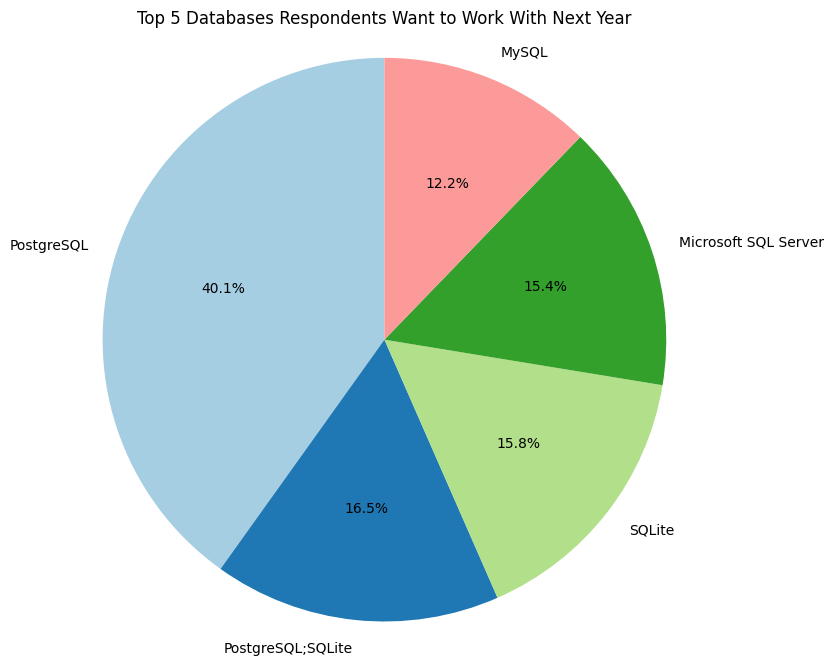

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('survey-data.csv')

# Check if 'DatabaseWantToWorkWith' column exists and drop rows with missing values
if 'DatabaseWantToWorkWith' in df.columns:
    # Count the occurrences of each database
    database_counts = df['DatabaseWantToWorkWith'].value_counts()

    # Select the top 5 databases
    top_5_databases = database_counts.head(5)

    # Plot the pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(top_5_databases, labels=top_5_databases.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

    # Formatting the plot
    plt.title('Top 5 Databases Respondents Want to Work With Next Year')
    plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.

    # Show the plot
    plt.show()
else:
    print("'DatabaseWantToWorkWith' column not found in the dataset.")


**Stacked Charts** 

Create a stacked bar chart of median `TimeSearching` and `TimeAnswering` for the age group 30 to 35.


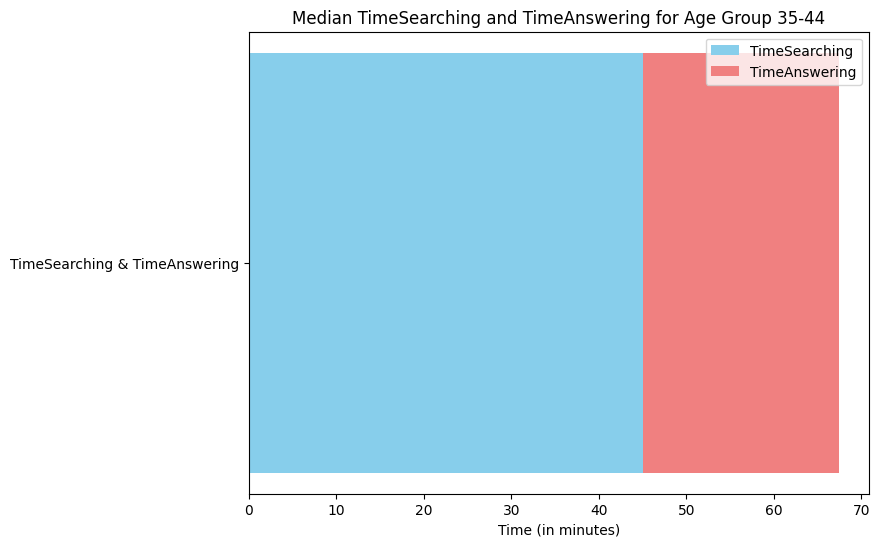

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('survey-data.csv')

# Replace age categories with numeric values
df['Age'] = df['Age'].replace({
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 65
})

# Convert 'Age' column to numeric, forcing any non-numeric values to NaN
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# Define a mapping function for time categories to numeric values (in minutes)
time_mapping = {
    'Less than 15 minutes a day': 7.5,
    '15-30 minutes a day': 22.5,
    '30-60 minutes a day': 45,
    '60-120 minutes a day': 90,
    'More than 120 minutes a day': 150
}

# Apply the mapping to TimeSearching and TimeAnswering columns
df['TimeSearching'] = df['TimeSearching'].map(time_mapping)
df['TimeAnswering'] = df['TimeAnswering'].map(time_mapping)

# Filter data for the age group 35-44 years
age_group = df[(df['Age'] >= 35) & (df['Age'] <= 44)]

# Drop rows with missing values in 'TimeSearching' and 'TimeAnswering'
age_group = age_group.dropna(subset=['TimeSearching', 'TimeAnswering'])

# Calculate the median of TimeSearching and TimeAnswering for this age group
median_values = age_group[['TimeSearching', 'TimeAnswering']].median()

# Plot a stacked bar chart
plt.figure(figsize=(8, 6))

# Plot the stacked bar chart
plt.barh(['TimeSearching & TimeAnswering'], median_values['TimeSearching'], color='skyblue', label='TimeSearching')
plt.barh(['TimeSearching & TimeAnswering'], median_values['TimeAnswering'], left=median_values['TimeSearching'], color='lightcoral', label='TimeAnswering')

# Add labels and title
plt.xlabel('Time (in minutes)')
plt.title('Median TimeSearching and TimeAnswering for Age Group 35-44')
plt.legend()

# Show the plot
plt.show()



### Visualizing Comparison of Data

**Line Chart**

Plot the median `CompTotal` for all ages from 45 to 60.


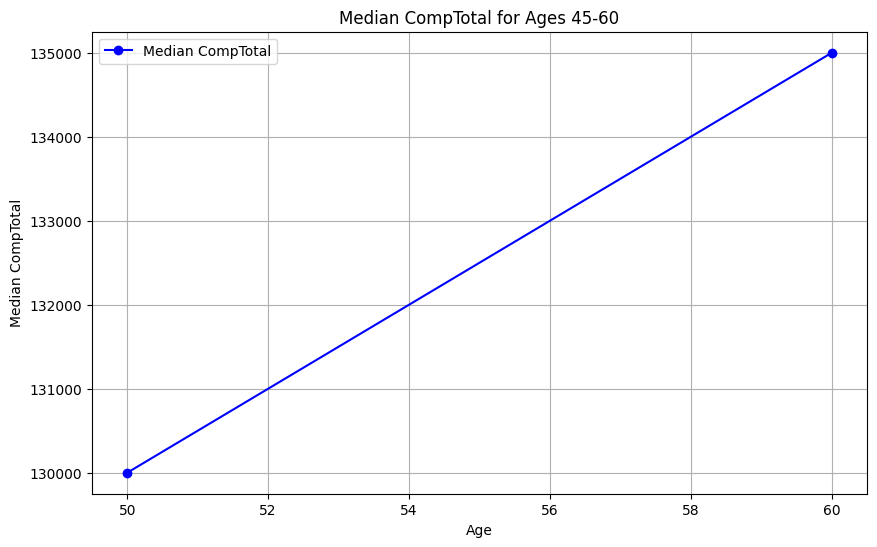

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('survey-data.csv')

# Replace age categories with numeric values (if needed)
df['Age'] = df['Age'].replace({
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 65
})

# Convert 'Age' column to numeric
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# Filter data for ages 45 to 60
age_group = df[(df['Age'] >= 45) & (df['Age'] <= 60)]

# Calculate the median of CompTotal for each age group
median_comp_total = age_group.groupby('Age')['CompTotal'].median()

# Plot the line chart
plt.figure(figsize=(10, 6))
plt.plot(median_comp_total.index, median_comp_total.values, marker='o', color='b', label='Median CompTotal')
plt.xlabel('Age')
plt.ylabel('Median CompTotal')
plt.title('Median CompTotal for Ages 45-60')
plt.legend()
plt.grid(True)
plt.show()


**Bar Chart**

Create a horizontal bar chart using the `MainBranch` column.


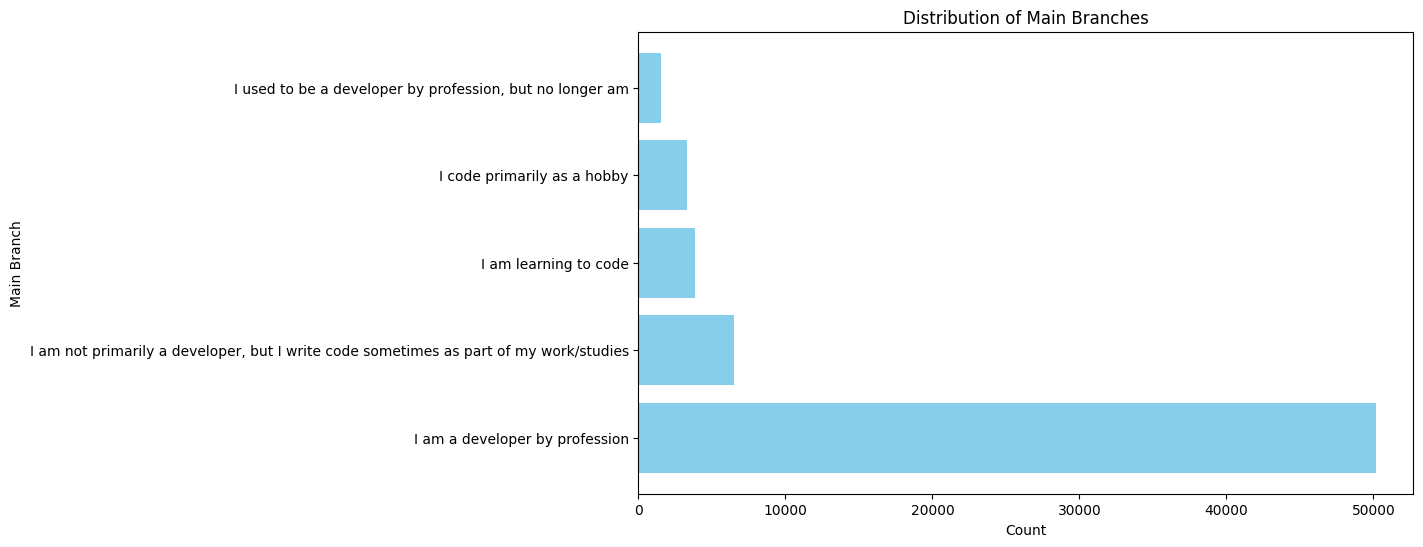

In [42]:
## Write your code here# Plot a horizontal bar chart for the MainBranch column
plt.figure(figsize=(10, 6))
mainbranch_counts = df['MainBranch'].value_counts()

plt.barh(mainbranch_counts.index, mainbranch_counts.values, color='skyblue')
plt.xlabel('Count')
plt.ylabel('Main Branch')
plt.title('Distribution of Main Branches')
plt.show()


### Summary


In this lab, you focused on extracting and visualizing data from an RDBMS using SQL queries and SQLite. You applied various visualization techniques, including:

- Histograms to display the distribution of CompTotal.
- Box plots to show the spread of ages.
- Scatter plots and bubble plots to explore relationships between variables like Age, WorkExp, `TimeSearching` and `TimeAnswering`.
- Pie charts and stacked charts to visualize the composition of data.
- Line charts and bar charts to compare data across categories.


### Close the Database Connection

Once the lab is complete, ensure to close the database connection:


In [ ]:
conn.close()

## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
